# soynlp를 사용해 토큰화

## 텍스트 데이터 전처리 이해하기

(출처 : [트위터 한국어 형태소 분석기](https://github.com/twitter/twitter-korean-text))

**정규화 normalization (입니닼ㅋㅋ -> 입니다 ㅋㅋ, 샤릉해 -> 사랑해)**

* 한국어를 처리하는 예시입니닼ㅋㅋㅋㅋㅋ -> 한국어를 처리하는 예시입니다 ㅋㅋ

**토큰화 tokenization**

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어Noun, 를Josa, 처리Noun, 하는Verb, 예시Noun, 입Adjective, 니다Eomi ㅋㅋKoreanParticle

**어근화 stemming (입니다 -> 이다)**

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어Noun, 를Josa, 처리Noun, 하다Verb, 예시Noun, 이다Adjective, ㅋㅋKoreanParticle


**어구 추출 phrase extraction** 

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어, 처리, 예시, 처리하는 예시

Introductory Presentation: [Google Slides](https://docs.google.com/presentation/d/10CZj8ry03oCk_Jqw879HFELzOLjJZ0EOi4KJbtRSIeU/)

In [1]:
from soynlp.tokenizer import RegexTokenizer
import pandas as pd
import warnings
warnings.simplefilter('ignore')

tokenizer = RegexTokenizer()
tokenizer

In [10]:
df = pd.read_csv('data/petition.csv',index_col='index')
df

,category,data
index,,
0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올..."
3,1,"티비 12세,15세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠..."
4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...
...,...,...
39995,2,시간유연근무제. 저는 국립대에서 일하고 있는 비정규직 근로자입니다.\n동시에 두 ...
39996,0,소년법을 폐지해 주시고 부산 여중생 가해자 학생들의 강력한 처벌을 요구합니다. 소년...
39997,2,무서운데 지켜야 할게 있어요 도와주세요. 안녕하세요 . 한부모엄마 입니다.\n양육비...


In [11]:
df.drop('category', axis=1, inplace=True)
df

,data
index,
0,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올..."
3,"티비 12세,15세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠..."
4,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...
...,...
39995,시간유연근무제. 저는 국립대에서 일하고 있는 비정규직 근로자입니다.\n동시에 두 ...
39996,소년법을 폐지해 주시고 부산 여중생 가해자 학생들의 강력한 처벌을 요구합니다. 소년...
39997,무서운데 지켜야 할게 있어요 도와주세요. 안녕하세요 . 한부모엄마 입니다.\n양육비...


In [12]:
sentences = df.stack()

In [17]:
%time tokens = sentences.apply(tokenizer.tokenize) # % : 주피터에서만 사용 가능, 출력 시간 나타냄
tokens[:5]

Wall time: 21.5 s


index      
0      data    [신혼부부위한, 주택정책, 보다, 보육시설, 늘려주세요, .., 국민세금으로, 일부...
1      data    [학교이름에, ', 남자, ', 도, 붙여주세요, ., 울산여자중학교에, 재학중인,...
2      data    [빙상연맹, ,, 대한축구협회등, 각종, 체육협회의, 비리를, 철저하게, 밝혀주세요...
3      data    [티비, 12, 세, ,, 15, 세, 관람가도, 연령확인, 의무화, 하자, ..,...
4      data    [무더운, 여름철엔, 남성들도, 시원한, 자율복장을, 해야, ., 무더운, 여름철에...
dtype: object

In [64]:
len(tokens)

39992

In [75]:
## 불용어 사전 불러오기

df = pd.read_csv('https://raw.githubusercontent.com/cranberryai/todak_todak_python/master/machine_learning_text/clean_korean_documents/korean_stopwords.txt', header=None)
df[0] = df[0].apply(lambda x: x.strip())
stopwords = df[0].to_numpy()

In [87]:
from konlpy.tag import Okt
# twitter = Twitter()
okt = Okt()

In [96]:
## 명사, 동사, 형용사만 있는 column을 만들겠습니다.
tmp = []
for word in alltoken:
    try:
        if okt.pos(word)[1] in ['Noun', 'Verb', 'Adjective']: #명사, 동사, 형용사
            if word not in stopwords: ## 불용어 제거
                tmp.append(word)
    except:
        pass

In [97]:
tmp

[]

In [98]:
 from itertools import chain
alltoken = list(chain(*tmp))

In [99]:
Counter(alltoken).most_common(200)

[]

In [18]:
from gensim.models import word2vec
# 모델 학습
model = word2vec.Word2Vec(tokens, min_count=1)
model
# %time model = word2vec.Word2Vec(token, min_count=1)

In [19]:
model_name = 'wtobtest1'
model.save(model_name)

In [24]:
model.wv.key_to_index

{'n': 0,
 '.': 1,
 '.\\': 2,
 '\\': 3,
 ',': 4,
 '수': 5,
 '있습니다': 6,
 '있는': 7,
 '(': 8,
 '합니다': 9,
 '1': 10,
 '?': 11,
 '그': 12,
 '..': 13,
 '?\\': 14,
 '이': 15,
 "'": 16,
 ')': 17,
 '2': 18,
 '3': 19,
 '대한': 20,
 '더': 21,
 '하는': 22,
 '저는': 23,
 '생각합니다': 24,
 '"': 25,
 '한': 26,
 '그리고': 27,
 '년': 28,
 '하고': 29,
 '할': 30,
 '이런': 31,
 '왜': 32,
 '및': 33,
 '많은': 34,
 '하지만': 35,
 '4': 36,
 '제': 37,
 '위해': 38,
 '/': 39,
 '너무': 40,
 '없는': 41,
 '또한': 42,
 '정말': 43,
 '것입니다': 44,
 ',\\': 45,
 '모든': 46,
 '제가': 47,
 '없습니다': 48,
 '것이': 49,
 '...': 50,
 '것은': 51,
 '현재': 52,
 '등': 53,
 '같은': 54,
 '5': 55,
 '다른': 56,
 '바랍니다': 57,
 '것': 58,
 '월': 59,
 '대한민국': 60,
 '..\\': 61,
 '많이': 62,
 '10': 63,
 '-': 64,
 '우리': 65,
 '입니다': 66,
 '지금': 67,
 '것을': 68,
 '일': 69,
 '아니라': 70,
 '다': 71,
 '%': 72,
 '또': 73,
 '위한': 74,
 '이렇게': 75,
 '때문에': 76,
 '아닌': 77,
 '제발': 78,
 '않고': 79,
 '잘': 80,
 '6': 81,
 '주세요': 82,
 '그런데': 83,
 '대해': 84,
 '다시': 85,
 '~': 86,
 '부탁드립니다': 87,
 '있도록': 88,
 '청원합니다': 89,
 '하지': 90,
 '중': 91

In [25]:
len(model.wv.key_to_index)

675049

In [26]:
vocab = model.wv.key_to_index
sorted(vocab, key=vocab.get, reverse=True)[:30]

['신혼부부위한',
 '도뇌르',
 '한국정부로부터는',
 '미국한인사회',
 '모란장을',
 '수여했을',
 '한국전에',
 '레지옹',
 '훈포상은',
 '훈포상을',
 '훈포상에',
 '발굴되거나',
 '훈포상하는',
 '암투병으로',
 '최고훈장인',
 '종결했기',
 '수여됐지만',
 '십자무공훈장과',
 '상훈을',
 '발발하자',
 '극심했던',
 '유색인',
 '유럽전선',
 '눈부셨습니다',
 '휴전선의',
 '정부로부터도',
 '중부와',
 '북상시키는데',
 '역할한',
 '그였습니다']

In [40]:
import re
s = vocab[0]
x = re.search("/^[가-힣\s]+$/", s)
print(x.group())

KeyError: 0

In [46]:
vocab

{'n': 0,
 '.': 1,
 '.\\': 2,
 '\\': 3,
 ',': 4,
 '수': 5,
 '있습니다': 6,
 '있는': 7,
 '(': 8,
 '합니다': 9,
 '1': 10,
 '?': 11,
 '그': 12,
 '..': 13,
 '?\\': 14,
 '이': 15,
 "'": 16,
 ')': 17,
 '2': 18,
 '3': 19,
 '대한': 20,
 '더': 21,
 '하는': 22,
 '저는': 23,
 '생각합니다': 24,
 '"': 25,
 '한': 26,
 '그리고': 27,
 '년': 28,
 '하고': 29,
 '할': 30,
 '이런': 31,
 '왜': 32,
 '및': 33,
 '많은': 34,
 '하지만': 35,
 '4': 36,
 '제': 37,
 '위해': 38,
 '/': 39,
 '너무': 40,
 '없는': 41,
 '또한': 42,
 '정말': 43,
 '것입니다': 44,
 ',\\': 45,
 '모든': 46,
 '제가': 47,
 '없습니다': 48,
 '것이': 49,
 '...': 50,
 '것은': 51,
 '현재': 52,
 '등': 53,
 '같은': 54,
 '5': 55,
 '다른': 56,
 '바랍니다': 57,
 '것': 58,
 '월': 59,
 '대한민국': 60,
 '..\\': 61,
 '많이': 62,
 '10': 63,
 '-': 64,
 '우리': 65,
 '입니다': 66,
 '지금': 67,
 '것을': 68,
 '일': 69,
 '아니라': 70,
 '다': 71,
 '%': 72,
 '또': 73,
 '위한': 74,
 '이렇게': 75,
 '때문에': 76,
 '아닌': 77,
 '제발': 78,
 '않고': 79,
 '잘': 80,
 '6': 81,
 '주세요': 82,
 '그런데': 83,
 '대해': 84,
 '다시': 85,
 '~': 86,
 '부탁드립니다': 87,
 '있도록': 88,
 '청원합니다': 89,
 '하지': 90,
 '중': 91

In [74]:
Counter(alltoken).most_common(100)

[('n', 289589),
 ('.', 181704),
 ('.\\', 130750),
 ('\\', 111265),
 (',', 110357),
 ('수', 27630),
 ('있습니다', 23697),
 ('있는', 20192),
 ('(', 19088),
 ('합니다', 18757),
 ('1', 18150),
 ('?', 18036),
 ('그', 17719),
 ('..', 17612),
 ('?\\', 16933),
 ('이', 16452),
 ("'", 16049),
 (')', 15183),
 ('2', 14505),
 ('3', 12047),
 ('대한', 11888),
 ('더', 11791),
 ('하는', 11676),
 ('저는', 11111),
 ('생각합니다', 10768),
 ('"', 10606),
 ('한', 9977),
 ('그리고', 9847),
 ('년', 9777),
 ('하고', 9727),
 ('할', 9604),
 ('이런', 9218),
 ('왜', 8281),
 ('및', 8270),
 ('많은', 8044),
 ('하지만', 7966),
 ('4', 7566),
 ('제', 7425),
 ('위해', 7321),
 ('/', 7286),
 ('너무', 7237),
 ('없는', 6942),
 ('또한', 6881),
 ('정말', 6592),
 ('것입니다', 6530),
 (',\\', 6489),
 ('모든', 6425),
 ('제가', 6375),
 ('없습니다', 6357),
 ('것이', 6269),
 ('...', 6145),
 ('것은', 6083),
 ('현재', 6007),
 ('등', 6002),
 ('같은', 5989),
 ('5', 5969),
 ('다른', 5792),
 ('바랍니다', 5607),
 ('것', 5551),
 ('월', 5516),
 ('대한민국', 5505),
 ('..\\', 5399),
 ('많이', 5386),
 ('10', 5352),
 ('-', 5344),


In [42]:
# Counter로 자주 등장하는 단어 보기
from collections import Counter
dict(Counter(vocab).most_common(100))

{'신혼부부위한': 675048,
 '도뇌르': 675047,
 '한국정부로부터는': 675046,
 '미국한인사회': 675045,
 '모란장을': 675044,
 '수여했을': 675043,
 '한국전에': 675042,
 '레지옹': 675041,
 '훈포상은': 675040,
 '훈포상을': 675039,
 '훈포상에': 675038,
 '발굴되거나': 675037,
 '훈포상하는': 675036,
 '암투병으로': 675035,
 '최고훈장인': 675034,
 '종결했기': 675033,
 '수여됐지만': 675032,
 '십자무공훈장과': 675031,
 '상훈을': 675030,
 '발발하자': 675029,
 '극심했던': 675028,
 '유색인': 675027,
 '유럽전선': 675026,
 '눈부셨습니다': 675025,
 '휴전선의': 675024,
 '정부로부터도': 675023,
 '중부와': 675022,
 '북상시키는데': 675021,
 '역할한': 675020,
 '그였습니다': 675019,
 '미국정부로부터는': 675018,
 '특별무공훈장과': 675017,
 '은성무공훈장': 675016,
 '동부를': 675015,
 '중부전선에서': 675014,
 '세우던': 675013,
 '우리군': 675012,
 '군사고문으로': 675011,
 '미사일부대를': 675010,
 '창설하게': 675009,
 '자주국방의': 675008,
 '국어교과서에': 675007,
 '수록돼': 675006,
 '자주국방이었습니다': 675005,
 '웬일인지': 675004,
 '살펴봐주시길': 675003,
 '한경우': 675002,
 '차에도': 675001,
 '재학생이라고': 675000,
 '재학생들로서는': 674999,
 '장학재단이나': 674998,
 '교문위에서도': 674997,
 '반대성명을': 674996,
 '장성들을': 674995,
 '퇴역': 674994,
 '지휘관들은': 674993,
 '전

In [33]:
w2c = dict()
for item in vocab:
   w2c[item] = vocab[item].count

w2cSorted = dict(sorted(w2c.items(), key=lambda x: x[1],reverse=True))
w2cSortedList = list(w2cSorted.keys())

AttributeError: 'int' object has no attribute 'count'

In [36]:
model.wv

In [35]:
min(vocab, key=vocab.get)

'n'

In [21]:
model.wv['문재인']

array([-3.4452906 ,  1.5093445 , -2.0832782 ,  1.8925114 ,  2.2384672 ,
       -3.4292905 , -1.7741657 ,  3.4683762 , -0.18240322, -0.63581944,
        1.0637751 , -1.3943471 , -3.7040365 ,  2.6070216 ,  1.2115247 ,
        0.7026731 ,  4.220235  , -1.7241443 , -3.4967365 , -2.9750206 ,
       -0.05978414,  2.7463722 ,  5.610617  , -1.9524843 ,  2.135245  ,
        1.9006301 , -1.1693875 ,  2.206215  ,  0.910791  ,  0.11986648,
        0.8671409 , -4.0359926 ,  2.9816093 , -3.278277  ,  0.10937776,
        0.44056895,  2.1224136 , -0.02393006,  1.5876706 ,  0.58130425,
       -3.2797234 ,  0.22371396, -2.0272636 , -2.498612  ,  0.61368775,
        0.4613444 , -2.5945883 , -0.5040783 ,  1.7385788 ,  1.2599431 ,
        1.0869883 , -0.6456342 , -0.42609194, -1.8346113 ,  1.5254438 ,
        1.337314  , -0.09808809, -1.8393185 , -2.0766473 ,  1.7504104 ,
       -2.6837687 , -0.3741818 , -1.7589895 , -0.44992563, -2.5239007 ,
        1.178839  ,  0.09363902,  2.825971  ,  1.5797321 ,  1.65

In [22]:
model.wv.most_similar('사이버')

[('내부', 0.9552810788154602),
 ('매크로', 0.9524915814399719),
 ('음원', 0.9508925080299377),
 ('민간인', 0.9465640187263489),
 ('이용한', 0.9460461735725403),
 ('업계의', 0.9446120858192444),
 ('허위사실', 0.9427132606506348),
 ('조직적', 0.9424910545349121),
 ('리벤지', 0.9423351287841797),
 ('하에', 0.9418299794197083)]

In [23]:
model.wv.most_similar('폐지')

[('셧다운제', 0.892556369304657),
 ('청소년보호법', 0.891700029373169),
 ('폐지를', 0.8826950788497925),
 ('낙태죄', 0.8823580145835876),
 ('소년법', 0.8753092885017395),
 ('보호법', 0.8700107336044312),
 ('청소년법', 0.8677681684494019),
 ('소년법과', 0.8673047423362732),
 ('간통죄', 0.8570410013198853),
 ('보호법은', 0.8492767810821533)]

In [24]:
model.wv.most_similar('교육')

[('사회', 0.7959590554237366),
 ('공교육', 0.786300778388977),
 ('해결', 0.7860680818557739),
 ('교육의', 0.7857617735862732),
 ('입시', 0.7796921133995056),
 ('교육에', 0.7781000137329102),
 ('환경', 0.7742553353309631),
 ('현재의', 0.7741007804870605),
 ('정책', 0.7692472338676453),
 ('다양한', 0.7681574821472168)]

In [25]:
model.wv.most_similar('부동산')

[('자동차', 0.9651572704315186),
 ('군수', 0.9630492329597473),
 ('외주', 0.9605842232704163),
 ('간호사', 0.9574715495109558),
 ('조폭들이', 0.9544854760169983),
 ('청원경찰', 0.953838050365448),
 ('위선적인', 0.9529625177383423),
 ('패스', 0.9526475667953491),
 ('cancellation', 0.9509868621826172),
 ('반미', 0.9496979713439941)]

In [26]:
model.wv.most_similar('여성')

[('남성', 0.9578308463096619),
 ('성매매', 0.8627005219459534),
 ('성', 0.85898756980896),
 ('우월', 0.8403581380844116),
 ('전용', 0.8334496021270752),
 ('성인', 0.8283827900886536),
 ('우월주의', 0.8277246356010437),
 ('혐오', 0.8271183371543884),
 ('페미니즘', 0.8256472945213318),
 ('차별', 0.8141047358512878)]

In [33]:
model.wv.most_similar('군대')

[('여자도', 0.83359295129776),
 ('남자', 0.8006253838539124),
 ('군면제', 0.7993513345718384),
 ('여자', 0.7991511821746826),
 ('여자들도', 0.7965216040611267),
 ('솔직히', 0.7951032519340515),
 ('방탄', 0.7872380614280701),
 ('군대를', 0.7860703468322754),
 ('여자들은', 0.7824102640151978),
 ('남자들', 0.7754940986633301)]

In [35]:
model.wv.most_similar('청년')

[('중산층', 0.9127557873725891),
 ('글로벌', 0.9119902849197388),
 ('유일한', 0.9006334543228149),
 ('국제화', 0.8998296856880188),
 ('성장', 0.8890177607536316),
 ('문화의', 0.8865483403205872),
 ('초등학교부터', 0.8861244320869446),
 ('인구', 0.8854069113731384),
 ('선진', 0.8841814994812012),
 ('아시아에서', 0.8811726570129395)]

In [37]:
model.wv.most_similar('집값')

[('거기다가', 0.9328426122665405),
 ('부동산', 0.9325047731399536),
 ('회장님', 0.9320117831230164),
 ('문신', 0.9305174946784973),
 ('카드로', 0.9298204183578491),
 ('오시는', 0.9293807148933411),
 ('일본도', 0.9288052916526794),
 ('cancellation', 0.9287106394767761),
 ('하늘의', 0.9277371168136597),
 ('넣는다구요', 0.9274489283561707)]

In [38]:
model.wv.most_similar('일자리')

[('경제', 0.9127703309059143),
 ('창출과', 0.9098976850509644),
 ('공교육', 0.8886312246322632),
 ('산업', 0.8844097852706909),
 ('엘리트', 0.8805626034736633),
 ('복지', 0.8799411654472351),
 ('인재', 0.8797410726547241),
 ('중소기업', 0.8797216415405273),
 ('해소', 0.878828763961792),
 ('부의', 0.8781720399856567)]

In [30]:
model.wv.most_similar('조사')

[('수사', 0.9415706396102905),
 ('감사', 0.9275488257408142),
 ('공개', 0.9067286252975464),
 ('재수사', 0.8883266448974609),
 ('구속', 0.8869852423667908),
 ('진상규명', 0.8818215727806091),
 ('재조사', 0.877772867679596),
 ('세무', 0.8705973625183105),
 ('삭제', 0.8704190254211426),
 ('문책', 0.8695582747459412)]

In [29]:
model.wv.most_similar('제발')

[('!!', 0.8497574329376221),
 ('개선좀', 0.8258187174797058),
 ('꼭좀', 0.823224663734436),
 ('!!!', 0.8203070163726807),
 ('보시기를', 0.8137428164482117),
 ('명절인', 0.7969119548797607),
 ('꼭', 0.7961652874946594),
 ('제발요', 0.7918023467063904),
 ('진짜', 0.7914038896560669),
 ('ㅠㅠ', 0.7911189198493958)]

In [31]:
model.wv.doesnt_match('반대 폐지 해체 혜택 무효'.split())

'혜택'

In [39]:
model.wv.similarity('주식', '부동산')

0.8991486

In [41]:
model.wv.similarity('사립', '비리')

0.67292

In [43]:
model.wv.similarity('혐오', '차별')

0.86534894

In [45]:
model.wv.similarity('예술', '스포츠')

0.74765134

In [46]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import gensim 
import gensim.models as g

mpl.rcParams['font.family']='Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

In [47]:
model_name = 'wtobtest1'
# model = g.Doc2Vec.load(model_name)
model =g.Word2Vec.load(model_name)

t-SNE 분석을 각각 한번씩한 결과를 시각화 해서 표현한 결과 인데, 보는 것과 같이 군집에 대한 특성은 그대로 유지 되지만 값 자체는 변화가 된것

In [48]:
 list(model.wv.key_to_index)

['n',
 '.',
 '.\\',
 '\\',
 ',',
 '수',
 '있습니다',
 '있는',
 '(',
 '합니다',
 '1',
 '?',
 '그',
 '..',
 '?\\',
 '이',
 "'",
 ')',
 '2',
 '3',
 '대한',
 '더',
 '하는',
 '저는',
 '생각합니다',
 '"',
 '한',
 '그리고',
 '년',
 '하고',
 '할',
 '이런',
 '왜',
 '및',
 '많은',
 '하지만',
 '4',
 '제',
 '위해',
 '/',
 '너무',
 '없는',
 '또한',
 '정말',
 '것입니다',
 ',\\',
 '모든',
 '제가',
 '없습니다',
 '것이',
 '...',
 '것은',
 '현재',
 '등',
 '같은',
 '5',
 '다른',
 '바랍니다',
 '것',
 '월',
 '대한민국',
 '..\\',
 '많이',
 '10',
 '-',
 '우리',
 '입니다',
 '지금',
 '것을',
 '일',
 '아니라',
 '다',
 '%',
 '또',
 '위한',
 '이렇게',
 '때문에',
 '아닌',
 '제발',
 '않고',
 '잘',
 '6',
 '주세요',
 '그런데',
 '대해',
 '다시',
 '~',
 '부탁드립니다',
 '청원합니다',
 '있도록',
 '하지',
 '중',
 ':',
 '‘',
 '아닙니다',
 '해주세요',
 '...\\',
 '“',
 '학교',
 '전',
 '이러한',
 '그런',
 '않습니다',
 '!',
 ')\\',
 '어떻게',
 '큰',
 '를',
 '모두',
 '꼭',
 '아이를',
 '있다',
 '있고',
 '’',
 '의',
 '물론',
 '될',
 '한다고',
 '제대로',
 '어린이집',
 '없이',
 '문제가',
 '을',
 '않는',
 '됩니다',
 '같습니다',
 '아이들이',
 '경우',
 '20',
 '안',
 '그래서',
 '7',
 '보고',
 '8',
 '그러나',
 '에',
 '대통령님',
 '통해',
 '때',
 '=',
 '좋겠습니다',
 

In [49]:
 model.wv['이를']

array([-2.802721  ,  0.0338245 ,  1.0094687 ,  1.7254269 , -0.01937157,
        1.2283243 ,  2.5099635 ,  1.705168  , -1.8525511 ,  3.0648878 ,
       -1.7115836 , -1.1069207 , -1.3799192 ,  1.7312799 , -0.8541408 ,
       -1.111307  , -1.4413446 ,  0.44162074, -3.41678   , -2.2909987 ,
       -0.34265354,  0.55903304,  1.849298  , -0.09281277,  2.922104  ,
        0.2724488 ,  1.1232262 , -1.0132301 , -5.394817  ,  1.1163357 ,
        2.3214755 , -1.9460222 , -2.0288517 ,  0.4700878 ,  0.74948514,
        1.213811  ,  0.7453264 , -0.0494578 ,  0.7866038 , -1.4840237 ,
        1.9623348 , -1.347949  , -1.6393055 , -0.26530296,  0.82198894,
       -0.99436843, -0.4727362 ,  1.7023903 ,  0.5950493 , -1.280321  ,
       -0.0545682 , -3.6394517 , -0.90235984, -0.37934574, -0.18545641,
        1.4092431 , -0.76193035, -2.6468709 , -1.2402254 , -0.7262659 ,
        2.2607539 , -0.39351085,  0.1055465 ,  0.41855437, -1.6701207 ,
       -1.4101864 ,  0.3121847 ,  3.6584954 , -1.7067071 , -1.52

In [50]:
vocab

{'n': 0,
 '.': 1,
 '.\\': 2,
 '\\': 3,
 ',': 4,
 '수': 5,
 '있습니다': 6,
 '있는': 7,
 '(': 8,
 '합니다': 9,
 '1': 10,
 '?': 11,
 '그': 12,
 '..': 13,
 '?\\': 14,
 '이': 15,
 "'": 16,
 ')': 17,
 '2': 18,
 '3': 19,
 '대한': 20,
 '더': 21,
 '하는': 22,
 '저는': 23,
 '생각합니다': 24,
 '"': 25,
 '한': 26,
 '그리고': 27,
 '년': 28,
 '하고': 29,
 '할': 30,
 '이런': 31,
 '왜': 32,
 '및': 33,
 '많은': 34,
 '하지만': 35,
 '4': 36,
 '제': 37,
 '위해': 38,
 '/': 39,
 '너무': 40,
 '없는': 41,
 '또한': 42,
 '정말': 43,
 '것입니다': 44,
 ',\\': 45,
 '모든': 46,
 '제가': 47,
 '없습니다': 48,
 '것이': 49,
 '...': 50,
 '것은': 51,
 '현재': 52,
 '등': 53,
 '같은': 54,
 '5': 55,
 '다른': 56,
 '바랍니다': 57,
 '것': 58,
 '월': 59,
 '대한민국': 60,
 '..\\': 61,
 '많이': 62,
 '10': 63,
 '-': 64,
 '우리': 65,
 '입니다': 66,
 '지금': 67,
 '것을': 68,
 '일': 69,
 '아니라': 70,
 '다': 71,
 '%': 72,
 '또': 73,
 '위한': 74,
 '이렇게': 75,
 '때문에': 76,
 '아닌': 77,
 '제발': 78,
 '않고': 79,
 '잘': 80,
 '6': 81,
 '주세요': 82,
 '그런데': 83,
 '대해': 84,
 '다시': 85,
 '~': 86,
 '부탁드립니다': 87,
 '청원합니다': 88,
 '있도록': 89,
 '하지': 90,
 '중': 91

In [51]:
X = model.wv[vocab]
X

array([[-1.08163834e+00,  3.69357371e+00,  6.61741793e-01, ...,
        -1.99186933e+00, -2.62557006e+00,  1.15216625e+00],
       [-2.45367813e+00,  3.30189371e+00, -1.71426976e+00, ...,
        -8.39976728e-01, -1.75567484e+00, -6.75593734e-01],
       [-1.00947833e+00,  1.42019534e+00, -2.92860198e+00, ...,
        -2.66584611e+00,  1.26193726e+00, -1.93740702e+00],
       ...,
       [-2.70814933e-02,  7.11555220e-03, -1.34235097e-03, ...,
        -7.10137561e-03,  1.43967965e-03,  5.63537795e-03],
       [-1.00031868e-02,  1.89306308e-02,  1.72360111e-02, ...,
        -5.30095864e-03, -8.62596743e-03,  3.43458890e-03],
       [-1.11398185e-02, -1.44457445e-04, -6.94169383e-03, ...,
        -2.92922445e-02,  2.51087476e-06,  8.00792780e-03]], dtype=float32)

In [75]:
vocab = list(model.wv.key_to_index)
X = model.wv[vocab]
print('Feature의 길이 {}'.format(len(X)))
print(X[0][:10])
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform( X[30000:30150,:] )

Feature의 길이 675014
[-1.0816383   3.6935737   0.6617418  -0.18124843  1.1769478  -0.906484
  0.23354523  0.2853076  -1.0720165   0.58171266]


In [76]:
X_tsne.shape

(150, 2)

In [77]:
df = pd.DataFrame(X_tsne, index=vocab[9900:10050], columns=['x', 'y'])
df.shape

(150, 2)

In [78]:
df

,x,y
폐원,6.546385,-2.572942
양성하는,-3.405823,5.953994
고려대,-2.271235,5.066546
죗값을,2.710855,0.904617
역으로,-4.451238,-0.136543
...,...,...
정도면,-4.912302,0.275405
인증을,-0.862385,5.150308
뽑아서,-0.872181,0.480139
의견으로,-4.980835,-4.035835


In [79]:
import warnings
warnings.simplefilter('ignore')

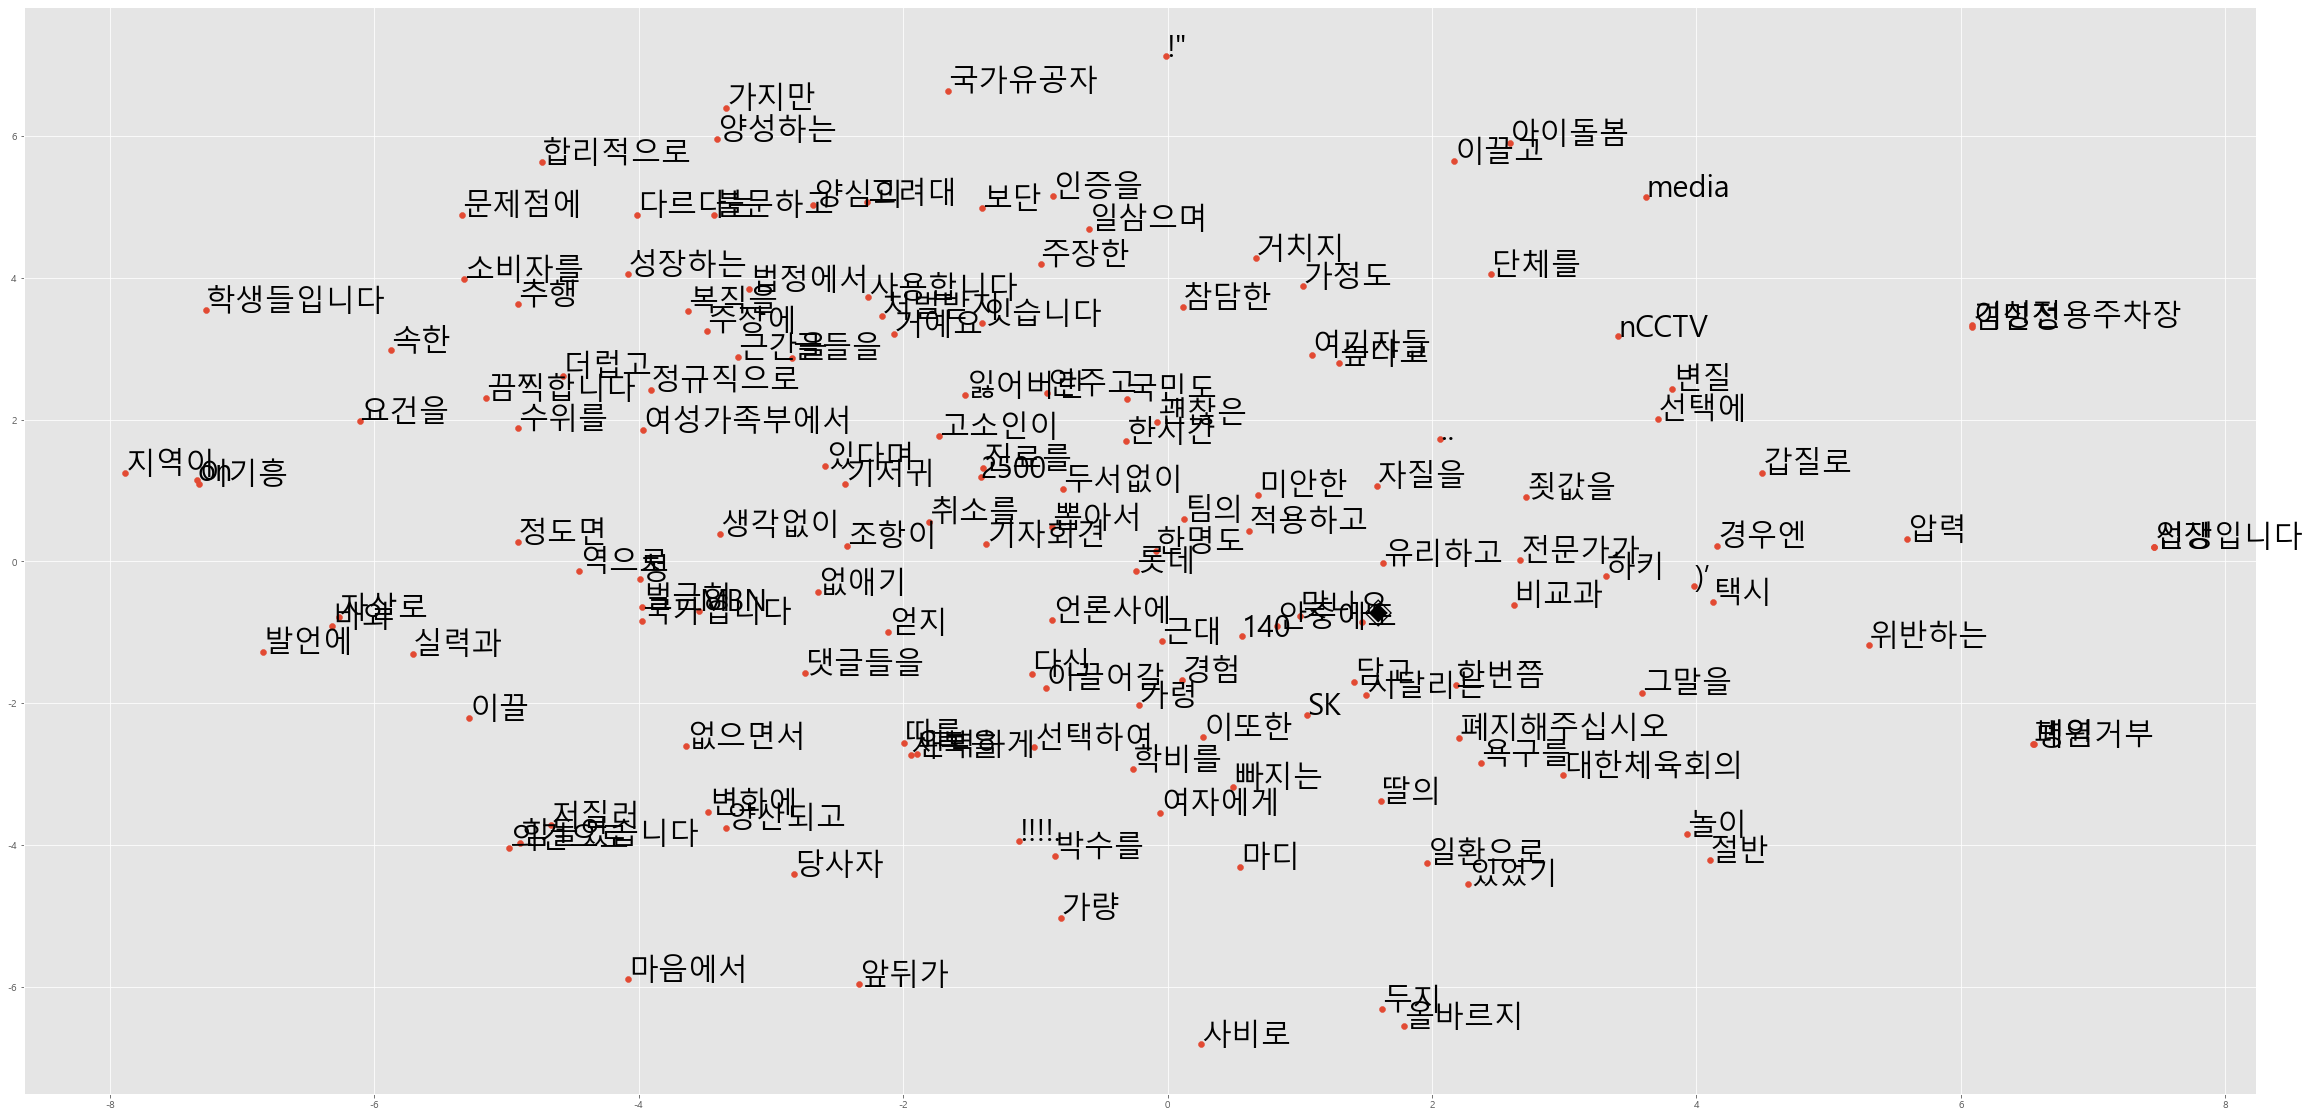

In [80]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()